In [1]:
import pandas as pd
df_plants_atlas_data = pd.read_csv ('records-2020-09-04.csv')

/Users/gunveen/anaconda3/envs/r-tutorial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_plants_atlas_data.shape

(3497721, 57)

In [3]:
df_plants_atlas_data.columns

Index(['Record ID', 'Catalogue Number', 'Taxon Concept GUID',
       'Scientific Name - original', 'Vernacular name - original',
       'Scientific Name', 'Taxon Rank', 'Vernacular name', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'Data Resource ID', 'Data Resource Name', 'Institution ID',
       'Institution', 'Collection ID', 'Collection', 'Licence',
       'Institution Code', 'Collection Code', 'Locality',
       'Latitude - original', 'Longitude - original',
       'Geodetic datum - original', 'Latitude', 'Longitude',
       'Coordinate Precision', 'Coordinate Uncertainty in Metres',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011',
       'IMCRA 4 Regions', 'IBRA 7 Regions', 'Minimum elevation in meters',
       'Maximum elevation in meters', 'Minimum depth in meters',
       'Maximum depth in meters', 'Individual count', 'Collector', 'Year',
       'Month', 'Day', 'Event Date - parsed', 'Verbatim even

In [4]:
#df_plants_atlas_data = data.applymap(lambda x: x.split()[0])

In [5]:
df_plants_atlas_data['State - parsed'].drop_duplicates()

0    Victoria
Name: State - parsed, dtype: object

In [6]:
df_plants_atlas_data['Genus'].head()

0    Scleranthus
1          Najas
2    Xerochrysum
3      Ammophila
4      Platysace
Name: Genus, dtype: object

In [8]:
import xlrd
df_plants_toxic_data = pd.read_excel('Toxic Plant List.xlsx')

In [9]:
df_plants_toxic_data.shape

(415, 4)

In [10]:
df_plants_toxic_data.columns

Index(['Common Name', 'Aliases', 'Scientific Name', 'Family'], dtype='object')

In [11]:
result = pd.merge(df_plants_atlas_data[['Genus','Record ID']],
                 df_plants_toxic_data,
                 left_on='Genus',right_on='Common Name',how='right')

In [12]:
result.head()

,Genus,Record ID,Common Name,Aliases,Scientific Name,Family
0,Geranium,fff3e636-46e0-4189-b8e2-7b55f94cc83e,Geranium,Many cultivars,Pelargonium species,Geraniaceae
1,Geranium,ffcef231-c64c-41dd-a35d-e8a2d043a0ea,Geranium,Many cultivars,Pelargonium species,Geraniaceae
2,Geranium,ffcb725d-c725-4aa9-91b8-5472c8745ad9,Geranium,Many cultivars,Pelargonium species,Geraniaceae
3,Geranium,ff6e4c4f-2978-4c71-8a7d-ee273e181784,Geranium,Many cultivars,Pelargonium species,Geraniaceae
4,Geranium,ff4f2a27-95d7-4ceb-aab1-b67f51959619,Geranium,Many cultivars,Pelargonium species,Geraniaceae


In [14]:
result.shape

(211085, 6)

In [16]:
result['Common Name'].drop_duplicates().shape

(412,)

In [17]:
result2 = pd.merge(df_plants_atlas_data[['Scientific Name','Record ID']],
                 df_plants_toxic_data,
                 left_on='Scientific Name',right_on='Scientific Name',how='right')

In [18]:
result2.head()

,Scientific Name,Record ID,Common Name,Aliases,Family
0,Digitalis purpurea,ffcd1341-412b-4701-8e6d-d401d9c4944b,Foxglove,None,Scrophalariaceae
1,Digitalis purpurea,ed6c963d-1daa-4914-8de8-6eeffc43a45d,Foxglove,None,Scrophalariaceae
2,Digitalis purpurea,f2cb4f15-c18a-4c53-b3fa-83e6c3d6b67e,Foxglove,None,Scrophalariaceae
3,Digitalis purpurea,f387919e-ec8d-45b0-be24-55c81d306493,Foxglove,None,Scrophalariaceae
4,Digitalis purpurea,f530ba5d-b09f-4330-b748-ef3172faf5ad,Foxglove,None,Scrophalariaceae


In [19]:
result2.shape

(24022, 5)

In [20]:
unique_records=result['Record ID']
# unique_records=unique_records.append(result['Record ID'], ignore_index = True) 
# unique_records=unique_records.append(result2['Record ID'], ignore_index = True) 
unique_records.head()

0    fff3e636-46e0-4189-b8e2-7b55f94cc83e
1    ffcef231-c64c-41dd-a35d-e8a2d043a0ea
2    ffcb725d-c725-4aa9-91b8-5472c8745ad9
3    ff6e4c4f-2978-4c71-8a7d-ee273e181784
4    ff4f2a27-95d7-4ceb-aab1-b67f51959619
Name: Record ID, dtype: object

In [21]:
unique_records.shape

(211085,)

In [22]:
unique_records=unique_records.append(result2['Record ID'], ignore_index = True) 
unique_records.head()

0    fff3e636-46e0-4189-b8e2-7b55f94cc83e
1    ffcef231-c64c-41dd-a35d-e8a2d043a0ea
2    ffcb725d-c725-4aa9-91b8-5472c8745ad9
3    ff6e4c4f-2978-4c71-8a7d-ee273e181784
4    ff4f2a27-95d7-4ceb-aab1-b67f51959619
Name: Record ID, dtype: object

In [23]:
unique_records.shape

(235107,)

In [24]:
unique_records=unique_records.drop_duplicates()
unique_records.head()

0    fff3e636-46e0-4189-b8e2-7b55f94cc83e
1    ffcef231-c64c-41dd-a35d-e8a2d043a0ea
2    ffcb725d-c725-4aa9-91b8-5472c8745ad9
3    ff6e4c4f-2978-4c71-8a7d-ee273e181784
4    ff4f2a27-95d7-4ceb-aab1-b67f51959619
Name: Record ID, dtype: object

In [25]:
unique_records.shape

(220779,)

In [26]:
result3 = pd.merge(df_plants_atlas_data[['Record ID',
       'Scientific Name - original',
       'Scientific Name','Family', 'Genus', 'Species','Latitude', 'Longitude',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011','Year',
       'Month', 'Day', 'Event Date - parsed', 
       'Basis Of Record - original']],unique_records,
        on='Record ID',how='inner')

In [27]:
result3.head()

,Record ID,Scientific Name - original,Scientific Name,Family,Genus,Species,Latitude,Longitude,Country - parsed,State - parsed,Local Government Areas 2011,Year,Month,Day,Event Date - parsed,Basis Of Record - original
0,fff3e636-46e0-4189-b8e2-7b55f94cc83e,Geranium potentilloides,Geranium potentilloides,Geraniaceae,Geranium,Geranium potentilloides,-37.3066,148.7594,Australia,Victoria,East Gippsland (S),1986.0,3.0,1.0,1986-03-01,HumanObservation
1,ffe4ba27-f56e-4ca9-965b-57b1af44f552,Eucalyptus camaldulensis,Eucalyptus camaldulensis,Myrtaceae,Eucalyptus,Eucalyptus camaldulensis,-36.1000,145.2000,Australia,Victoria,Moira (S),2011.0,3.0,30.0,2011-03-30,HumanObservation
2,ffdf88d9-60b5-4317-be33-d7c6182f08b5,Eucalyptus cypellocarpa,Eucalyptus cypellocarpa,Myrtaceae,Eucalyptus,Eucalyptus cypellocarpa,-37.3452,148.4741,Australia,Victoria,East Gippsland (S),1984.0,3.0,1.0,1984-03-01,HumanObservation
3,ffdcf9a6-1bfc-4cdd-aa03-8aeecfba7677,Eucalyptus rubida,Eucalyptus rubida,Myrtaceae,Eucalyptus,Eucalyptus rubida,-37.5044,143.9054,Australia,Victoria,Ballarat (C),2011.0,3.0,4.0,2011-03-04,HumanObservation
4,ffdcbeff-8c03-4d9c-ba03-5d169c6b9fd5,Eucalyptus fastigata,Eucalyptus fastigata,Myrtaceae,Eucalyptus,Eucalyptus fastigata,-37.4091,148.8127,Australia,Victoria,East Gippsland (S),1988.0,3.0,11.0,1988-03-11,HumanObservation


In [28]:
result3.shape

(220778, 16)

In [29]:
result3.to_csv('Filted_plants_atlas_data.csv')

In [30]:
result3['Scientific Name'].drop_duplicates().shape

(590,)

In [31]:
result3['Genus'].drop_duplicates().shape

(61,)

In [32]:
result3['Year'] = result3['Year'].astype(str).replace('\.0', '', regex=True)
result3['Month'] = result3['Month'].astype(str).replace('\.0', '', regex=True)
result3['Day'] = result3['Day'].astype(str).replace('\.0', '', regex=True)

In [33]:
result3.describe()

,Latitude,Longitude
count,219960.000000,219960.000000
mean,-37.374455,145.437193
std,0.836989,2.141602
min,-39.135000,140.963800
25%,-37.864725,143.946100
50%,-37.524700,145.278300
75%,-37.000000,146.984700
max,-34.003800,149.974167


In [34]:
result3.groupby(['Year']).agg(number_of_rows=('Year','count')).reset_index().sort_values(by=['Year'],ascending=False).head(10)

,Year,number_of_rows
178,nan,2260
177,2020,1566
176,2019,1452
175,2018,1177
174,2017,874
173,2016,668
172,2015,887
171,2014,1519
170,2013,3412
169,2012,11452


In [35]:
BBox = ((result3.Longitude.min(),   result3.Longitude.max(),      
         result3.Latitude.min(), result3.Latitude.max()))
print(BBox)

(140.9638, 149.9741666667, -39.135, -34.0038)


In [36]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [37]:
boundry_map = plt.imread('map (1).png')

(-39.135, -34.0038)

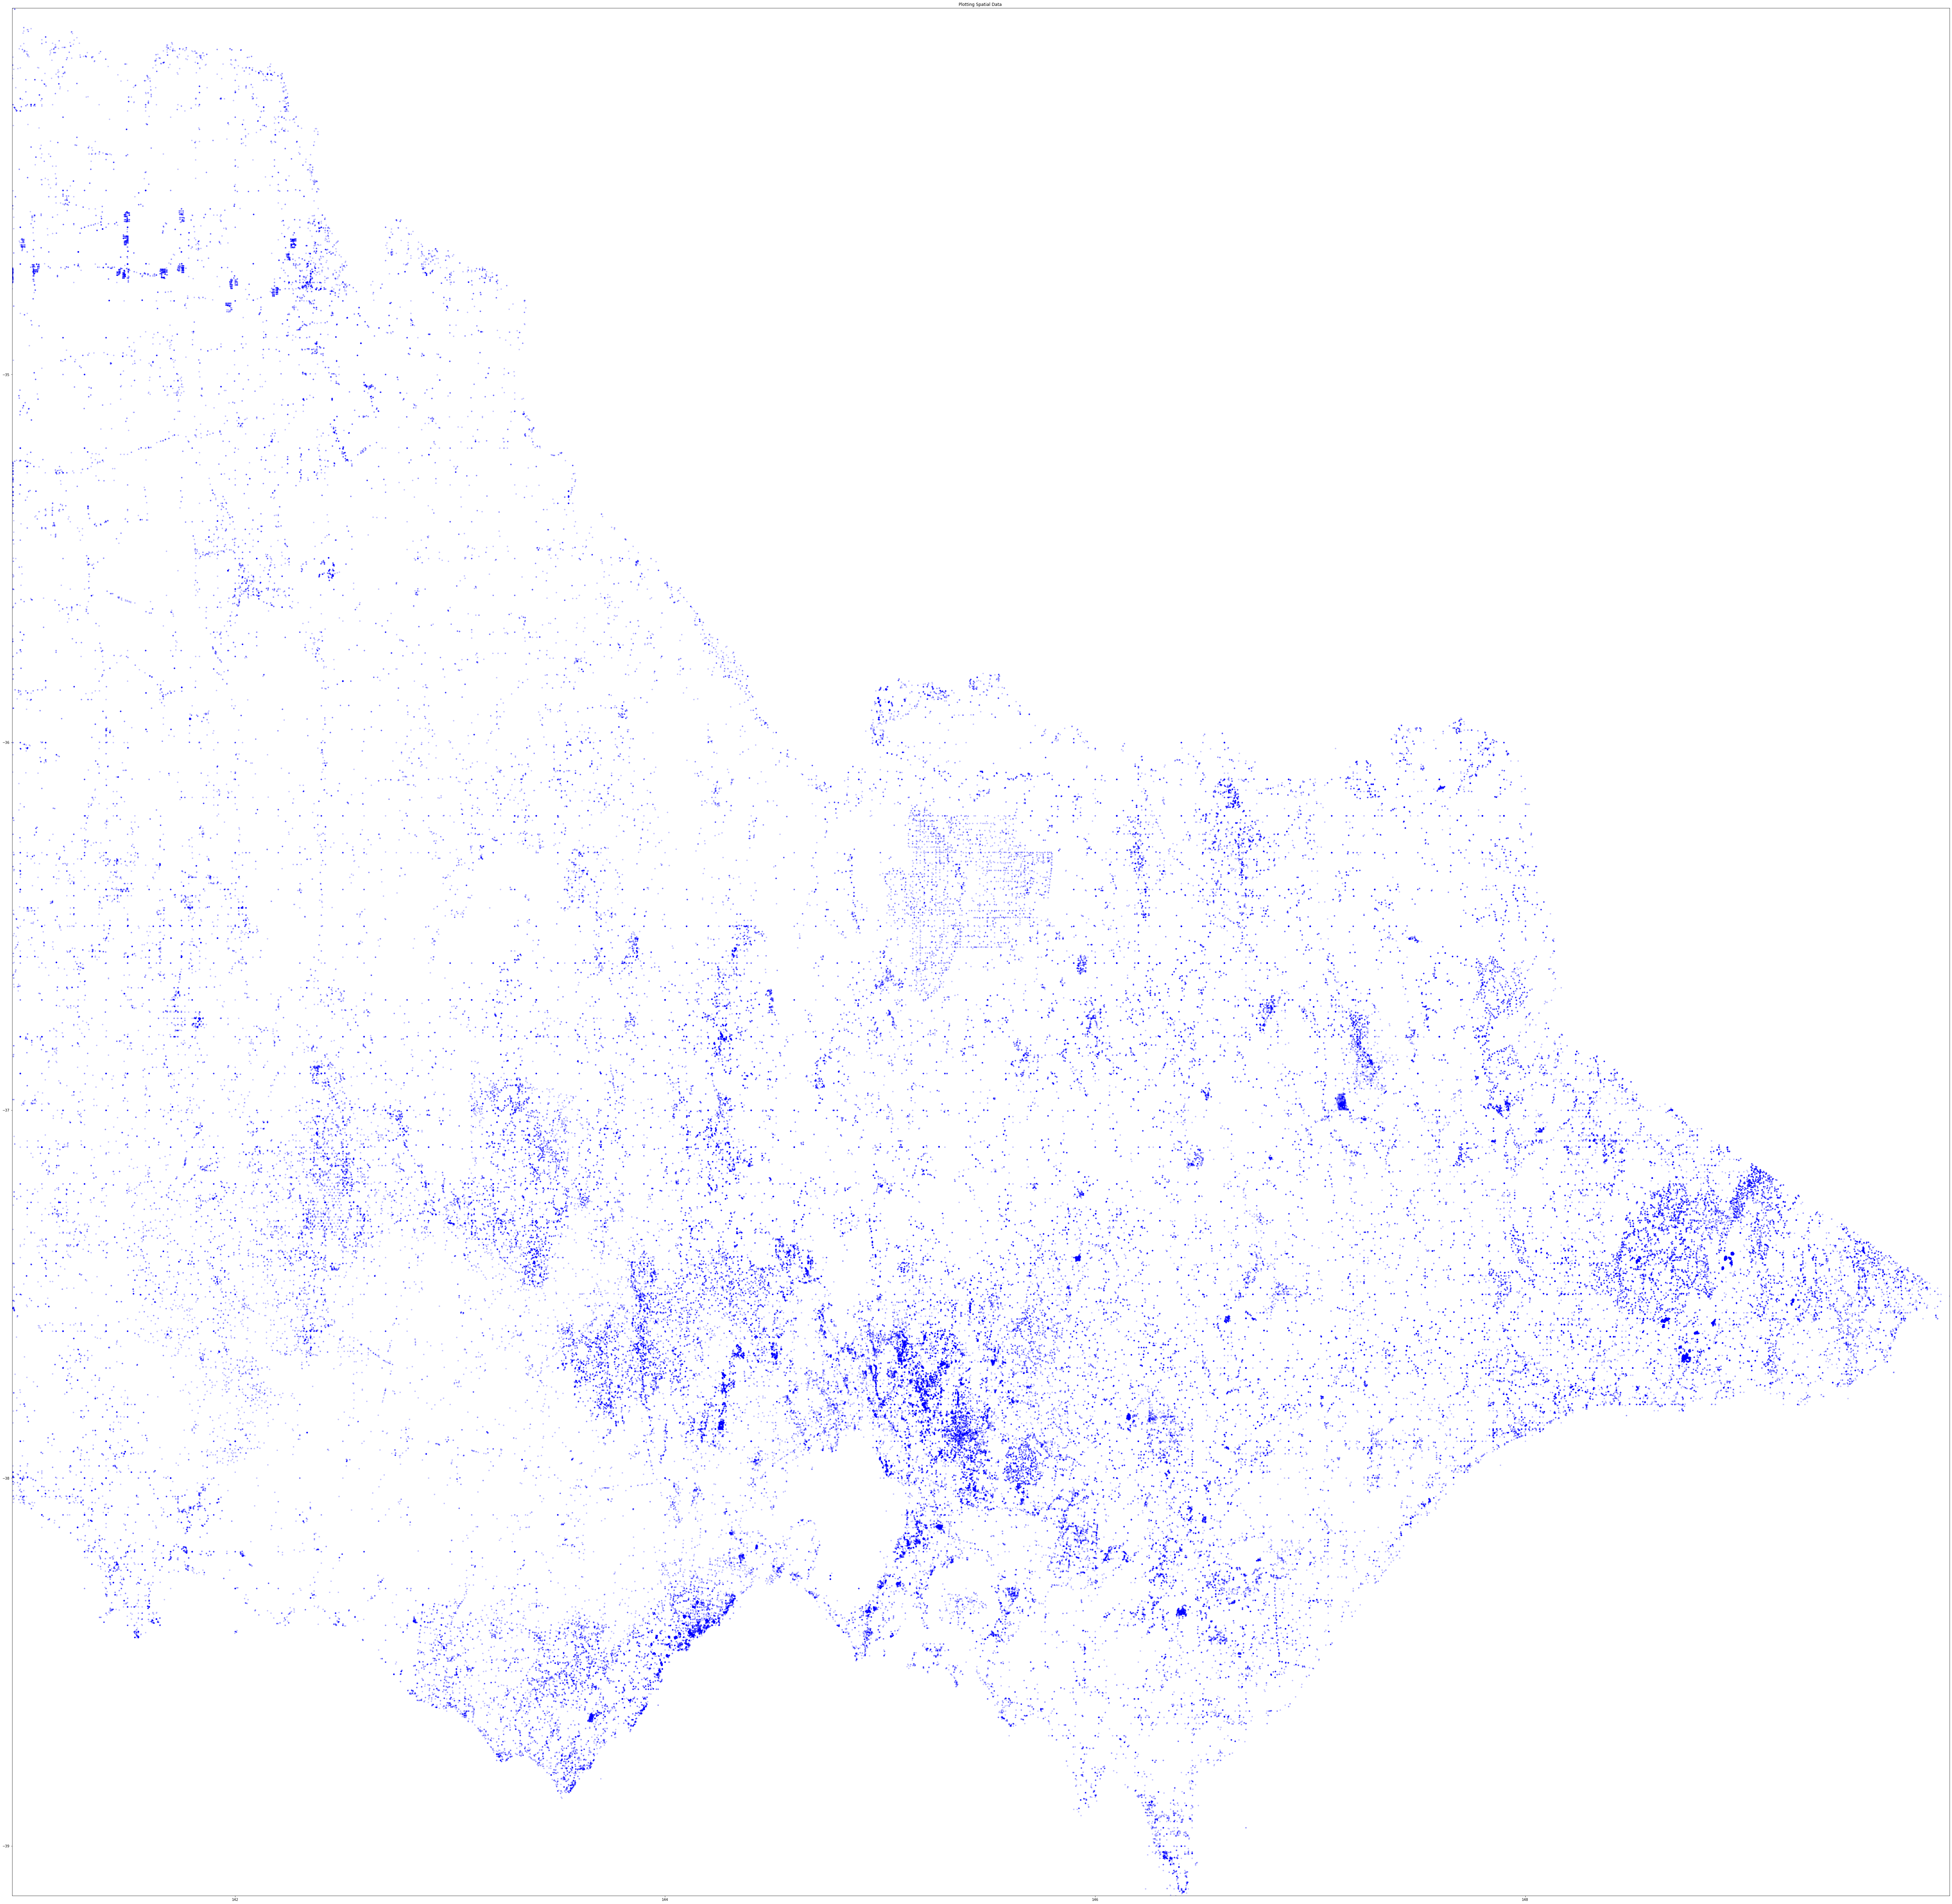

In [38]:
fig, ax = plt.subplots(figsize = (100,100))
ax.scatter(result3.Longitude, result3.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data ')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(boundry_map, zorder=0, extent = BBox, aspect= 'equal')

In [39]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(result3['Longitude'], result3['Latitude'])]
gdf = GeoDataFrame(result3, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

NameError: name 'GeoDataFrame' is not defined